In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install matplotlib
!pip install seaborn

In [25]:
import warnings
warnings.simplefilter("ignore")

In [26]:
df = pd.read_csv("../artifacts/raw/train.csv") 
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [27]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [28]:
df.drop(columns=["Booking_ID"], inplace=True, axis=1)

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [30]:
df.shape

(29020, 18)

In [31]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(7661)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(21359, 18)

In [35]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [45]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

#### Our data is imbalanced

In [46]:
cat_cols = [
        'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved',  'market_segment_type', 'repeated_guest',
       'booking_status'
]

num_cols = [
        'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'lead_time','arrival_year', 
        'arrival_month','arrival_date', 'no_of_previous_cancellations', 
        'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests', 
        
]

In [47]:
len(cat_cols), len(num_cols)

(6, 12)

In [50]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


UNIVARIATE ANALYSIS

In [52]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 5*len(num_features)))
    if len(num_features) == 1:
        axes = [axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Distribution of {column}", fontsize=15)

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Boxplot of {column}", fontsize=15)

    plt.tight_layout()
    plt.show()


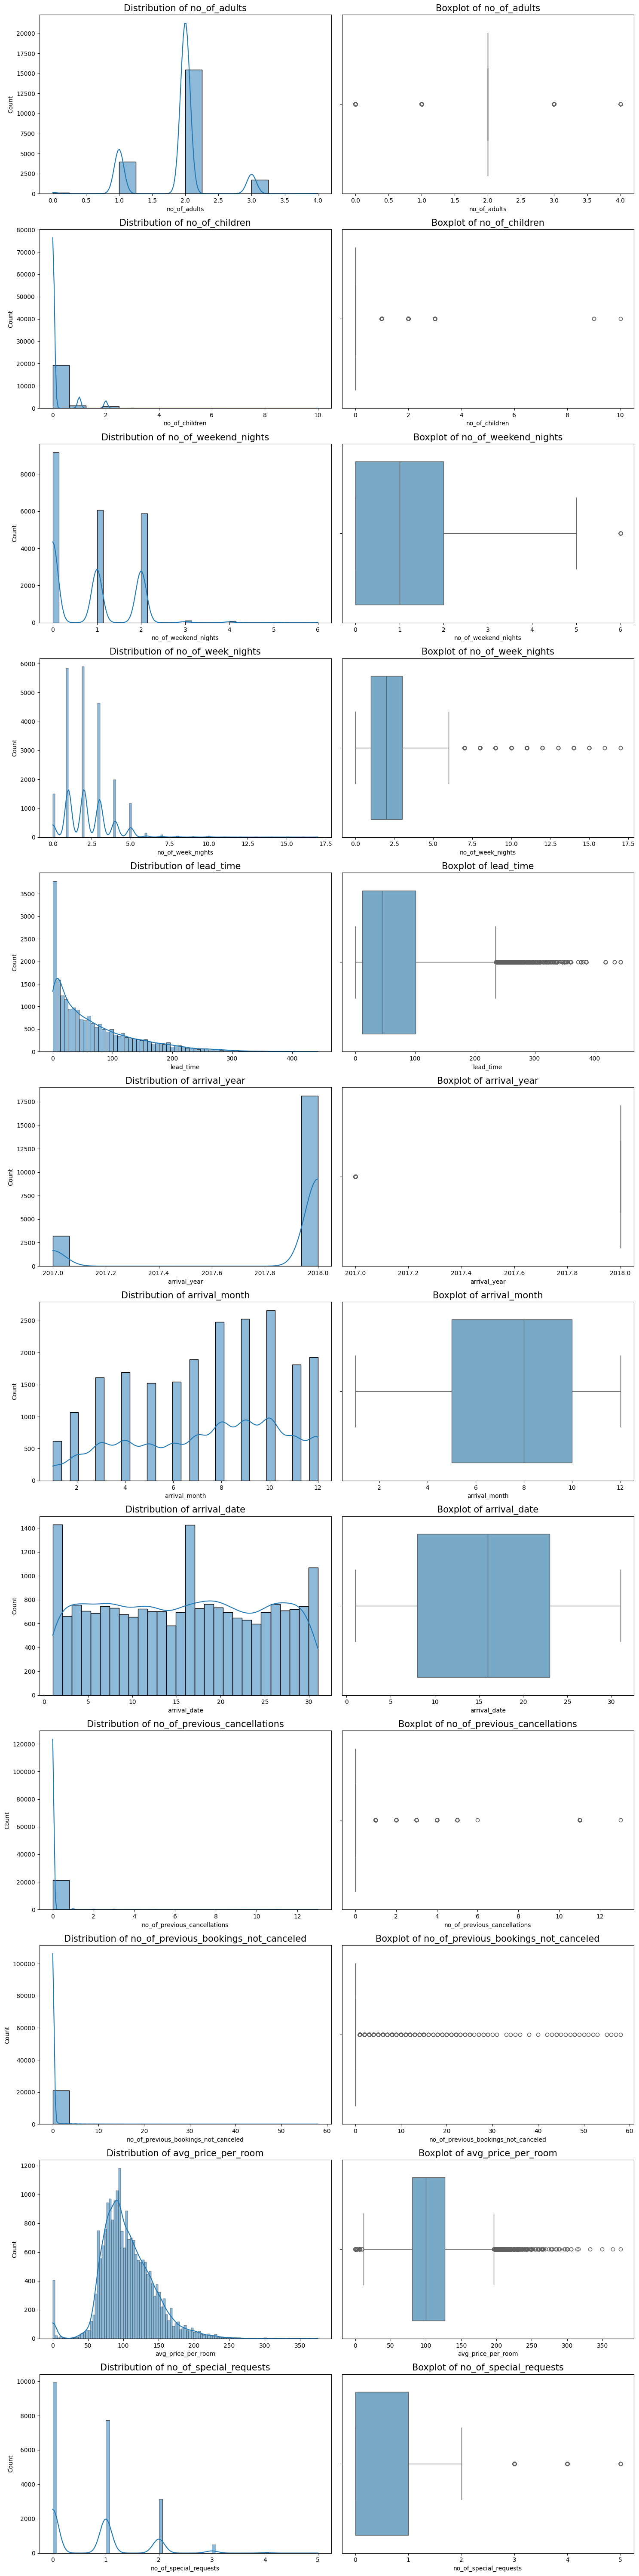

In [53]:
num_plot_dist(data, num_cols)

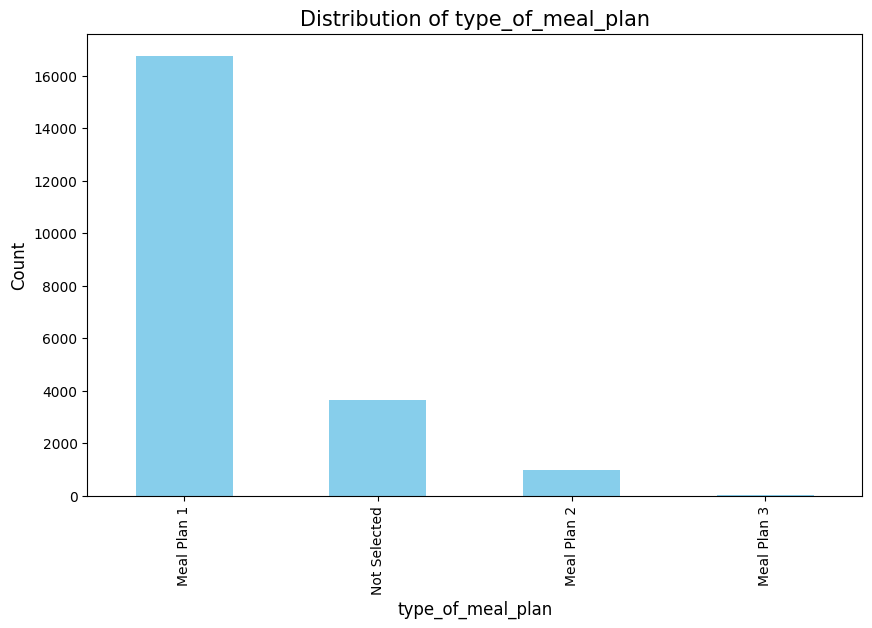

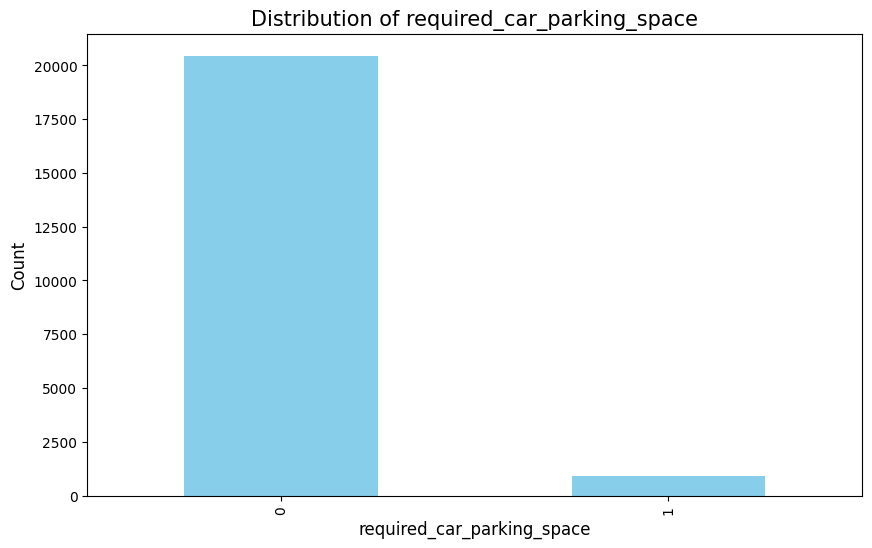

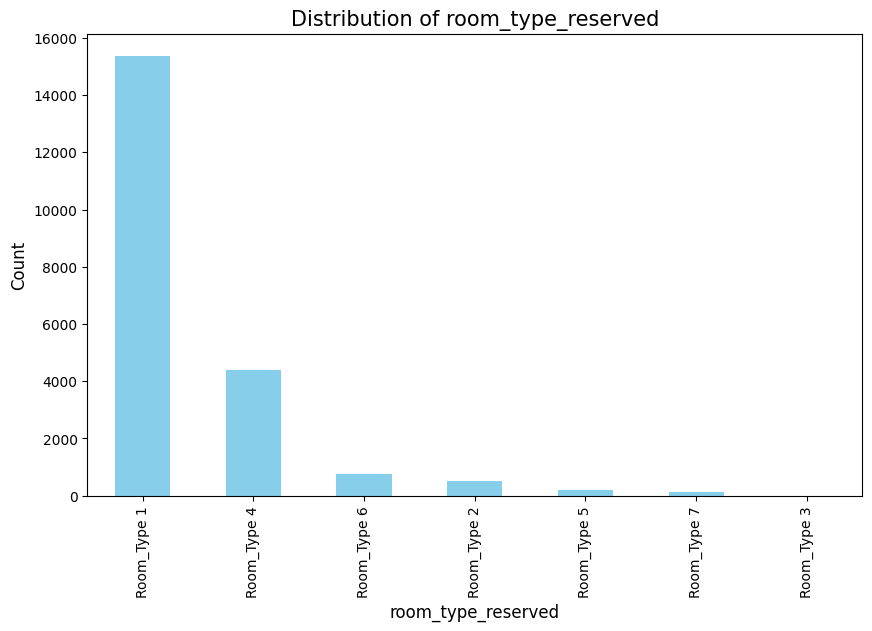

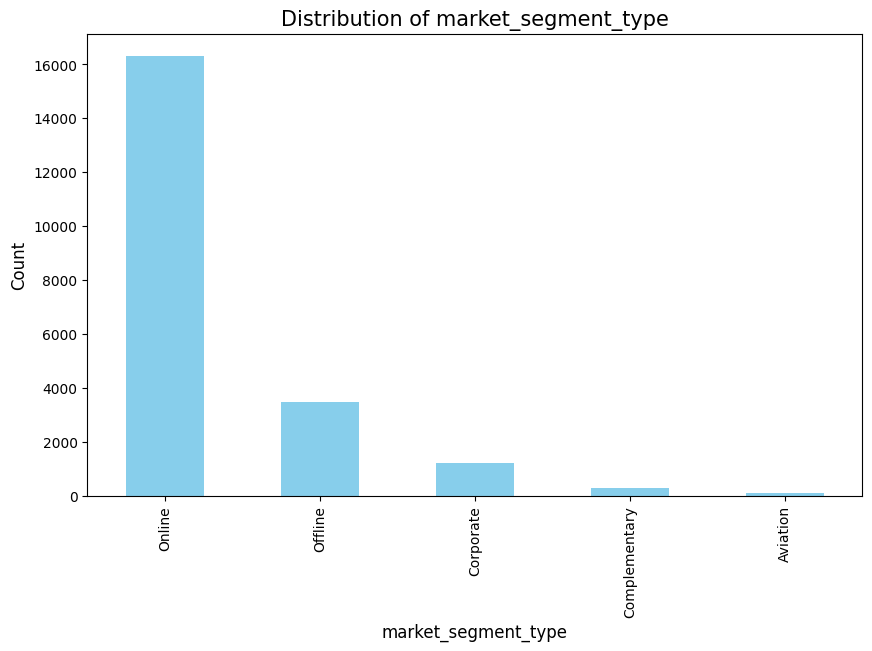

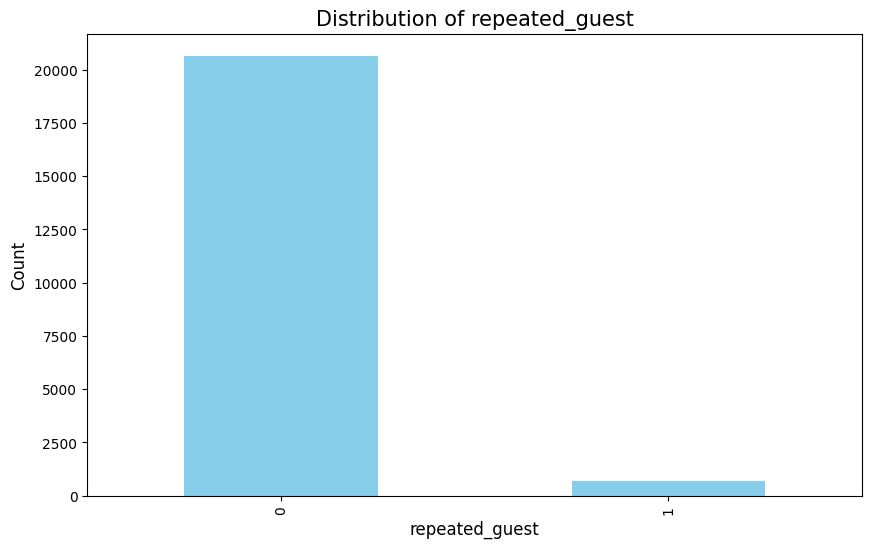

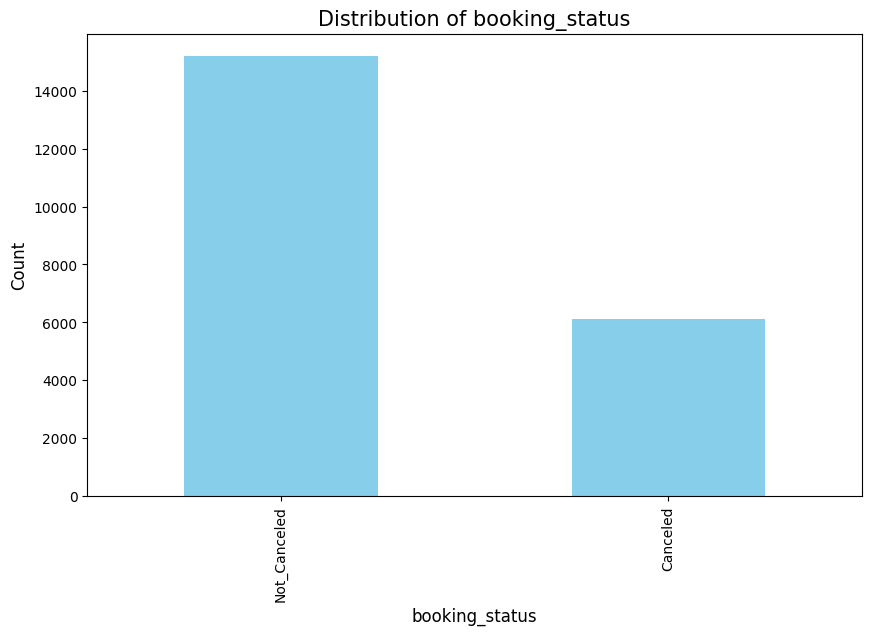

In [54]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {cat_feature}", fontsize=15)
    plt.xlabel(cat_feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

### BIVARIATE ANALYSIS ###

In [57]:
def plot_bivariate(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], palette="Blues")
        axes[i].set_title(f"{target} vs {column}", fontsize=15)

    plt.tight_layout()
    plt.show()

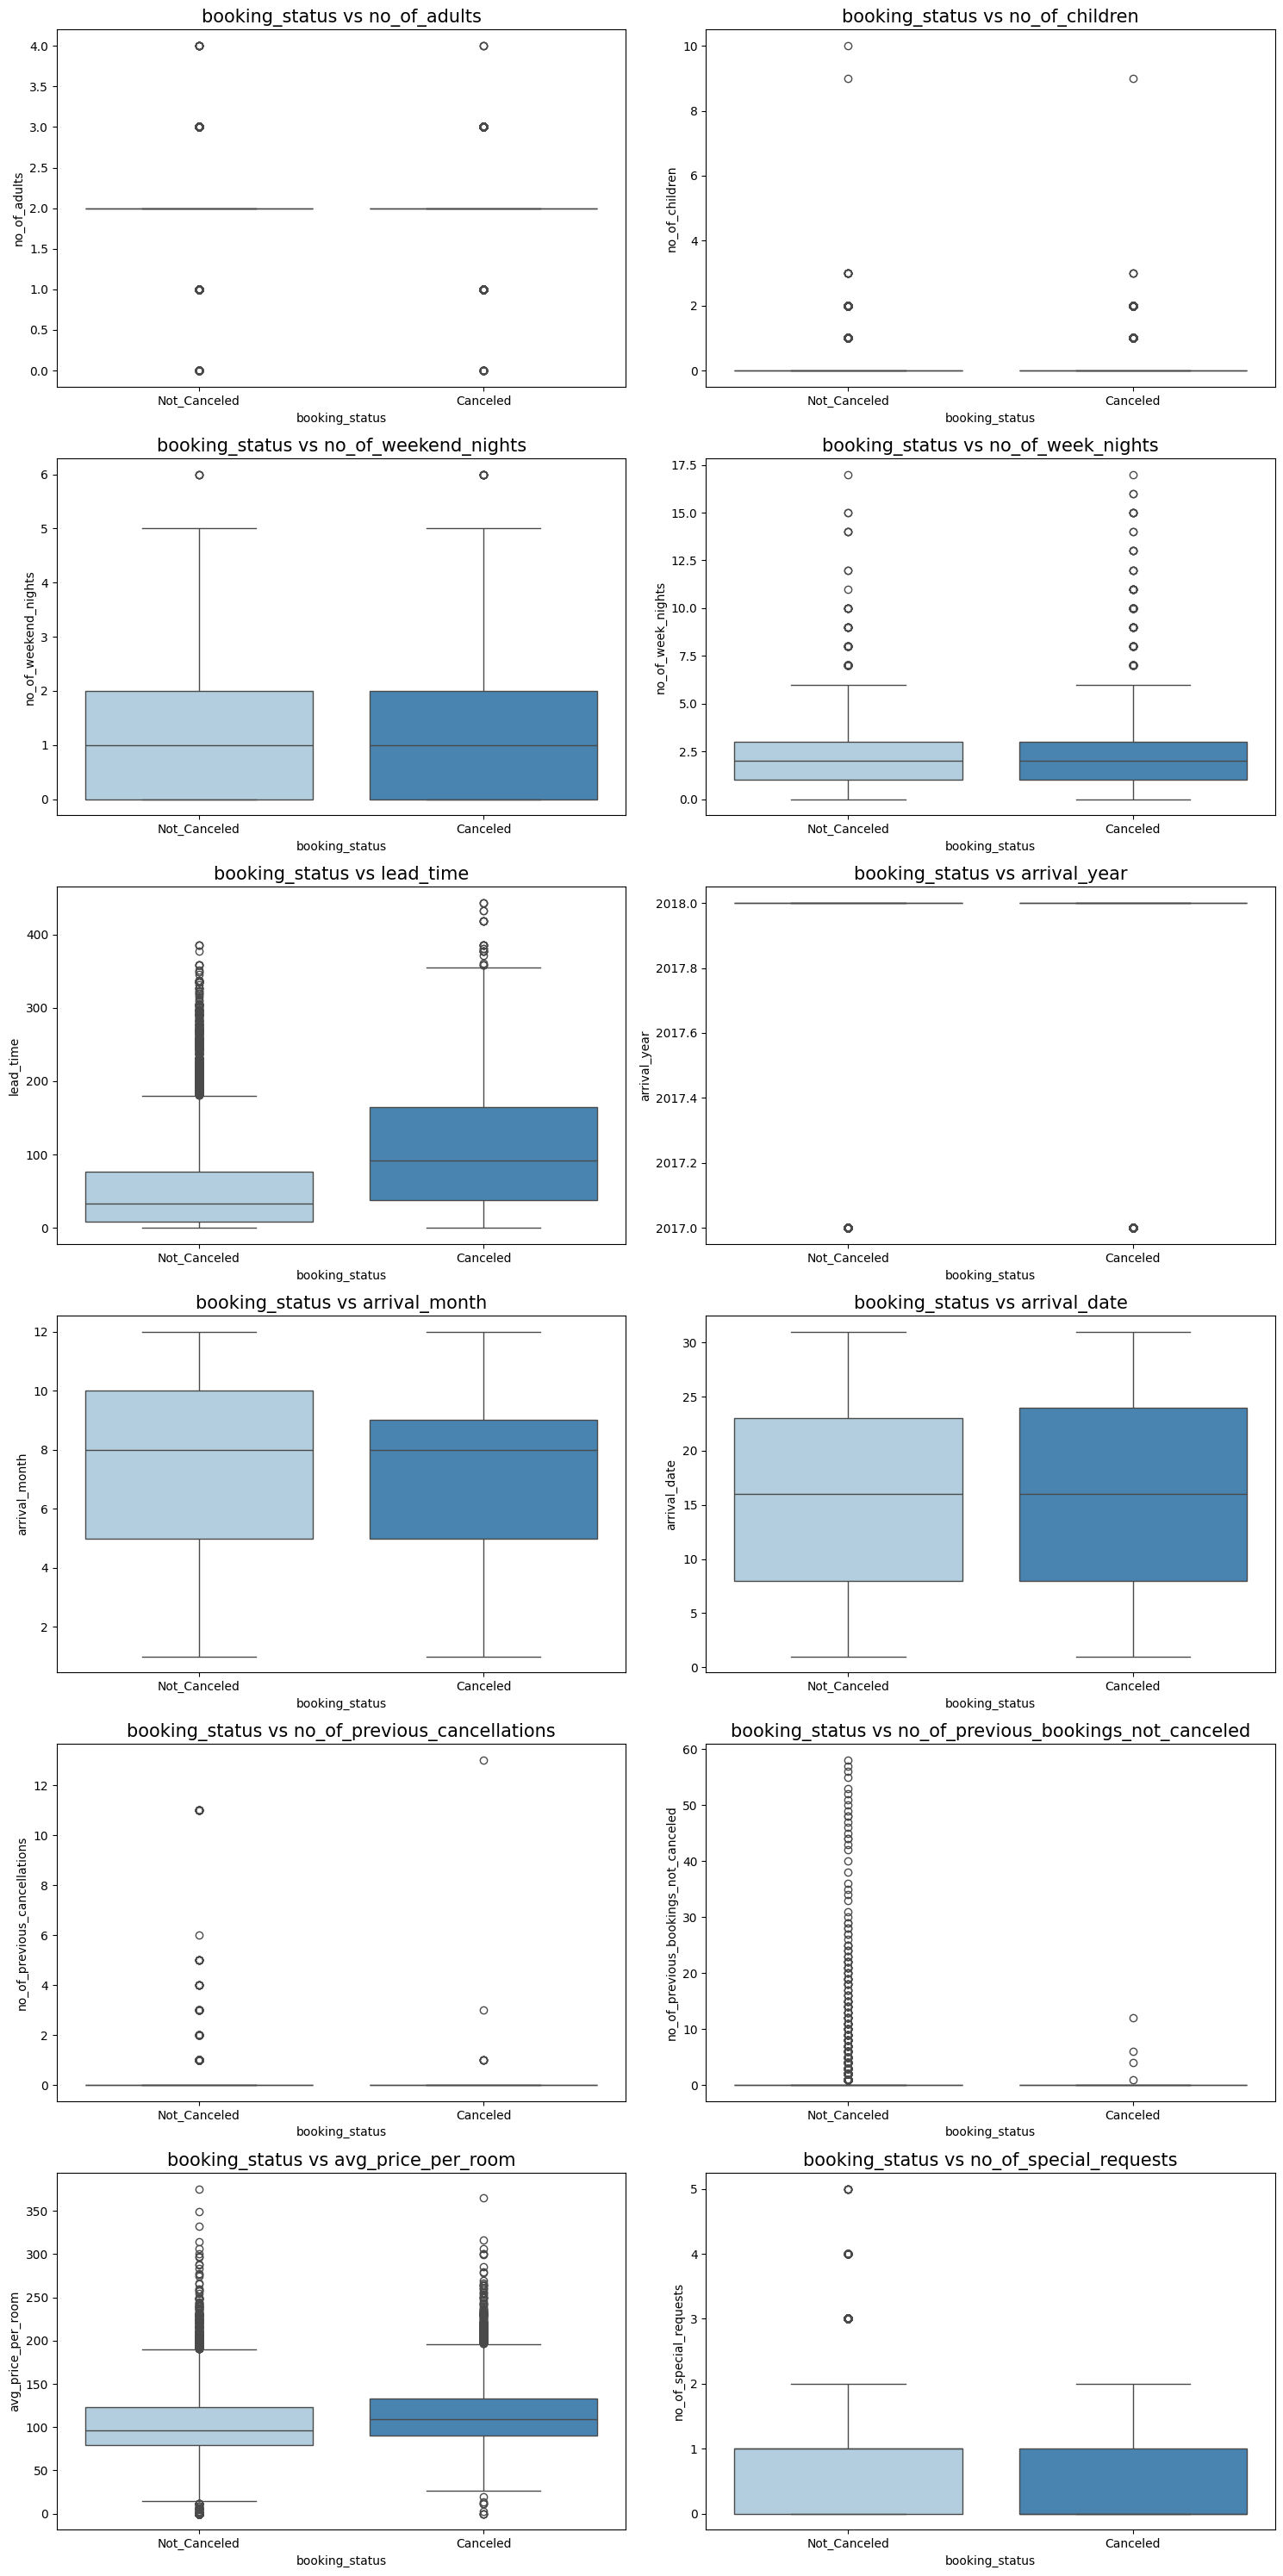

In [58]:
plot_bivariate(data, "booking_status", num_cols)

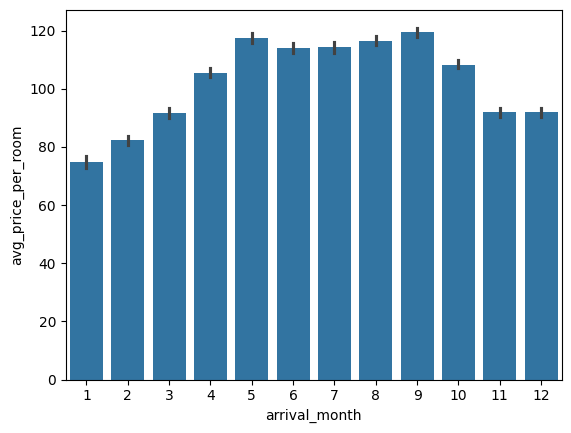

In [61]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [64]:
def plot_bivariate_cat(df, target, cat_feature):

    num_feature = len(cat_feature)
    num_rows = (num_feature + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    for i, feature in enumerate(cat_feature):
        sns.countplot(x=feature, hue=target, data=df, ax=axes[i], palette="Set2")
        axes[i].set_title(f"{target} vs {feature}", fontsize=15)
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

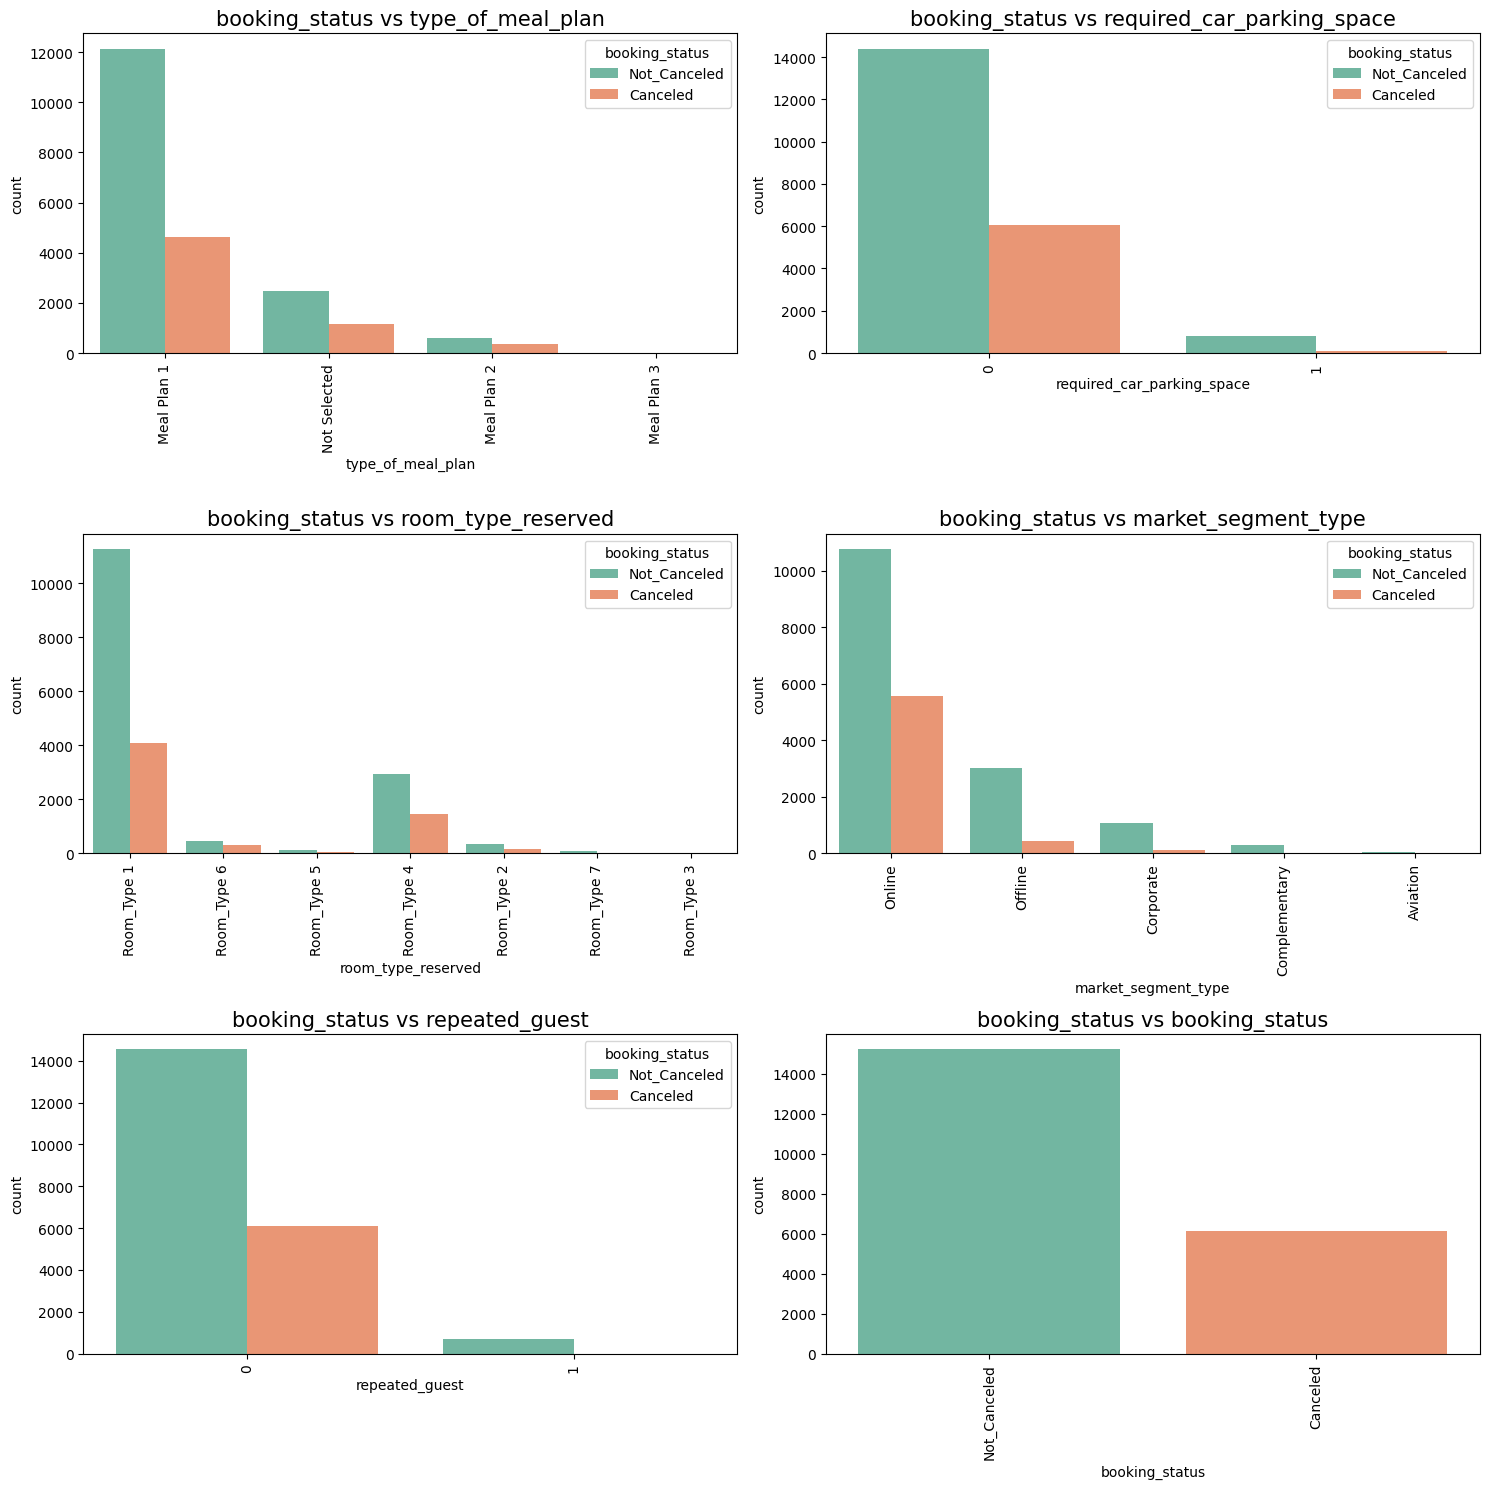

In [66]:
plot_bivariate_cat(data, "booking_status", cat_cols)

# DATA PROCESSING

In [67]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### LABEL ENCODING

In [69]:
from sklearn.preprocessing import LabelEncoder

lable_encoder = LabelEncoder()
mapping = {}

for col in cat_cols:
    df[col] = lable_encoder.fit_transform(df[col])
    mapping[col] = dict(zip(lable_encoder.classes_, lable_encoder.transform(lable_encoder.classes_)))
    


In [70]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [71]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### MULTI COLINEARITY ### 


In [74]:
!pip install statsmodels

     ---------------------------------------- 9.9/9.9 MB 27.4 MB/s eta 0:00:00
     ---------------------------------------- 232.9/232.9 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [80]:
X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [81]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


### OUR DATA DON"T HAVE MULTI-COLINERITY

In [82]:
corr = df.corr()

In [83]:
corr 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

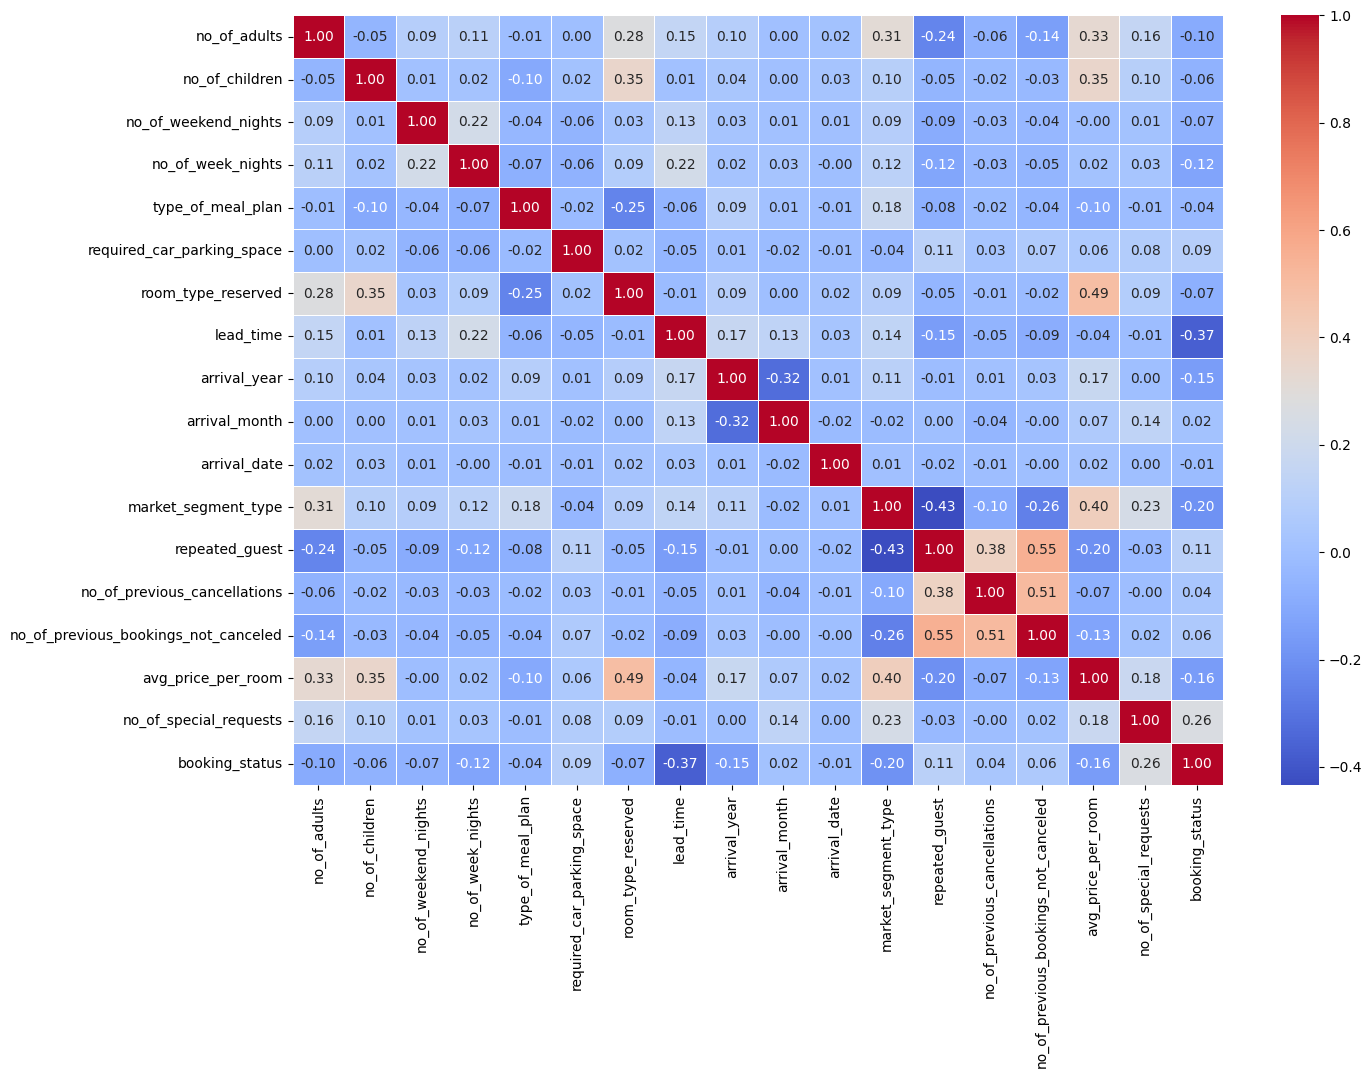

In [84]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### SKEWNESS

In [87]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [86]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

### IMBALANCE DATA

In [88]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [89]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [90]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [92]:
!pip install imbalanced-learn

     -------------------------------------- 238.4/238.4 kB 5.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [97]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [99]:
df.shape

(21359, 18)

In [100]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res.values

In [101]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [102]:
df.shape

(21359, 18)

#### FEATURE SELECTION

In [103]:
len(df.columns)

18

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=10)
model.fit(X, y)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [107]:
feature_importance =  model.feature_importances_

In [108]:
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": feature_importance})

In [113]:
top_features_importance_df =  feature_importance_df.sort_values(by="importance", ascending=False)

In [114]:
len(df.columns)

18

In [115]:
top_10_features = top_features_importance_df["feature"].head(10).values
top_10_features = df[top_10_features.tolist() + ["booking_status"]]

In [116]:
top_10_features.head()

,lead_time,no_of_special_requests,market_segment_type,avg_price_per_room,arrival_month,arrival_year,no_of_week_nights,arrival_date,no_of_weekend_nights,required_car_parking_space,booking_status
0,26,0,4,161.00,10,2017,1,17,2,0,1
1,98,2,4,121.50,7,2018,1,16,1,0,1
2,433,0,3,70.00,9,2018,3,8,0,0,0
3,195,0,3,72.25,8,2018,5,8,2,0,1
4,188,0,3,130.00,6,2018,2,15,0,0,0


In [118]:
len(top_10_features.columns)

11

In [119]:
df = top_10_features.copy()

In [120]:
!pip install Xgboost lightgbm 

     ------------------------------------- 150.0/150.0 MB 15.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 90.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [122]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [124]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42, probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=10),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, n_estimators=100, max_depth=10),
    "LightGBM": LGBMClassifier(random_state=42, n_estimators=100, max_depth=10),
}

In [125]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1 Score": []
}

In [126]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))


[LightGBM] [Info] Number of positive: 12185, number of negative: 4902
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 17087, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.713115 -> initscore=0.910562
[LightGBM] [Info] Start training from score 0.910562


In [128]:
metrics_df = pd.DataFrame(metrics)

In [129]:
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.853230,0.918582,0.880705,0.899245
1,Gradient Boosting,0.849485,0.908733,0.883498,0.895938
2,LogisticRegression,0.807350,0.908076,0.835902,0.870496
3,SVC,0.754213,0.972751,0.753944,0.849484
4,Decision Tree,0.842931,0.899212,0.882694,0.890877
5,KNN,0.745787,0.872948,0.791840,0.830418
6,Naive Bayes,0.689841,0.639856,0.895269,0.746314
7,AdaBoost,0.820693,0.899540,0.856250,0.877362
8,XGBoost,0.845506,0.905778,0.880907,0.893169
9,LightGBM,0.858614,0.917597,0.887865,0.902486


#### TRAIN OUR RF MODEL ON THE BALANCED DATASET

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [132]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [133]:
rf = RandomForestClassifier(random_state=42)


In [134]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False],
}

In [135]:
randm_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [136]:
randm_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, max_features=0.2650913108795474, min_samples_leaf=4, min_samples_split=6, n_estimators=120; total time=   1.0s
[CV] END bootstrap=True, max_depth=38, max_features=0.2650913108795474, min_samples_leaf=4, min_samples_split=6, n_estimators=120; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, max_features=0.2650913108795474, min_samples_leaf=4, min_samples_split=6, n_estimators=120; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, max_features=0.2650913108795474, min_samples_leaf=4, min_samples_split=6, n_estimators=120; total time=   1.1s
[CV] END bootstrap=True, max_depth=38, max_features=0.2650913108795474, min_samples_leaf=4, min_samples_split=6, n_estimators=120; total time=   1.1s
[CV] END bootstrap=True, max_depth=28, max_features=0.18997742423620262, min_samples_leaf=3, min_samples_split=9, n_estimators=472; total time=   3.7s
[CV] END bootstrap=True, max_depth=28, 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001895B83A610>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001895B83B450>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001895B83AD50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001895B83BC50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001895B838E10>},
                   random_state=42, scoring='accuracy', verbose=2)

In [137]:
randm_search.best_params_

{'bootstrap': False,
 'max_depth': 39,
 'max_features': np.float64(0.29110519961044856),
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 376}

In [138]:
best_rf = randm_search.best_estimator_

In [139]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8560
Recall: 0.9258
Precision: 0.8788
F1 Score: 0.9017


In [140]:
import joblib

In [142]:
loaded_model = joblib.dump(best_rf, "../artifacts/models/random_forest.pkl")

In [144]:
loaded_model = joblib.load("../artifacts/models/random_forest.pkl") 

In [143]:
X_train[0:1]

,lead_time,no_of_special_requests,market_segment_type,avg_price_per_room,arrival_month,arrival_year,no_of_week_nights,arrival_date,no_of_weekend_nights,required_car_parking_space
23772,24,2,4,130.78,10,2017,5,26,2,0


In [146]:
new_data = np.array(X_train[0:1].values.tolist()).reshape(1, -1)

In [147]:
prediction = loaded_model.predict(new_data)

In [148]:
prediction

array([1])